In [1]:
import numpy as np
import pandas as pd

# load the sarcoma transcriptome data
sarcoma_df = pd.read_csv('Data/sarcoma-gene-exp-FPKM-zscore-no-label.csv')
sarcoma_df.shape

(206, 20605)

In [2]:
sarcoma_labels_df = pd.read_csv('Data/sarcoma-gene-exp-FPKM-labels-only.csv')
sarcoma_labels_df.shape

(206, 1)

In [3]:
# Convert transriptome df to np array
X = sarcoma_df.to_numpy()
print(X)

[[-0.51154087  0.09480786 -0.35176093 ...  0.51624723  0.02346097
   2.48359169]
 [-0.19129576  0.15347405  0.20261954 ... -0.41028013  2.86123234
   0.16777757]
 [ 0.26472818  2.327348   -0.56049386 ... -0.21651268  0.0192731
   0.76332633]
 ...
 [ 0.24931652 -0.03363532 -0.97441342 ... -0.50605902 -1.23871739
   0.28153212]
 [ 0.2581943  -0.8373263  -0.19647611 ... -0.29302061 -0.78367962
  -0.7597076 ]
 [-0.07085013 -0.29522455 -0.59015045 ... -0.50644652 -0.01137879
  -0.39862195]]


In [4]:
# Convert label df to np array
y_df = sarcoma_labels_df['label']
y = y_df.to_numpy()
print(y)

[4 2 2 1 5 3 2 4 4 3 4 4 4 3 0 3 1 4 2 4 4 0 2 4 3 3 3 2 0 4 4 5 3 3 2 4 4
 5 4 3 4 4 5 4 2 4 4 4 1 4 1 4 4 2 4 3 3 2 2 4 4 4 4 4 4 4 2 2 3 4 2 3 4 4
 3 4 3 2 4 3 2 3 4 4 3 4 3 4 3 4 4 1 3 4 4 4 0 4 3 4 3 3 3 5 2 0 3 3 1 1 4
 2 3 0 3 4 2 4 2 0 3 4 4 3 2 2 1 3 4 4 4 4 4 3 2 4 2 4 1 0 2 2 3 4 4 2 3 4
 4 3 1 3 4 3 4 2 2 1 3 2 2 0 4 2 1 4 2 1 4 3 3 4 2 4 2 4 3 4 2 1 3 4 2 4 4
 2 2 3 4 4 4 3 2 4 1 1 2 3 0 3 3 2 2 3 1 2]


In [5]:
# For t-SNE analysis a perplexity of 60 and an angle of 0.5 (default - used with Barnes-Hut T-SNE) were used. 
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=60, angle=0.5).fit_transform(X)
# X_embedded = TSNE(n_components=200, perplexity=60, method="exact").fit_transform(X)
X_embedded.shape

(206, 2)

In [6]:
# concatenate the components with the label and then get the mean of each component grouped by label
sarcoma_tsne_df = pd.DataFrame(X_embedded) 
components_labels_df = pd.merge(sarcoma_tsne_df, sarcoma_labels_df, right_index=True, left_index=True)
components_labels_df.columns = ['comp1','comp2','label']
components_labels_df

,comp1,comp2,label
0,1.510188,4.495065,4
1,-0.393332,-2.255418,2
2,0.523942,-2.903832,2
3,2.405639,0.771423,1
4,-2.590276,-1.889321,5
...,...,...,...
201,0.564202,-1.062506,2
202,0.788572,-1.430965,2
203,2.381024,-3.868348,3
204,3.371063,-0.305507,1


In [7]:
sarcoma_histo_df = pd.read_csv('Data/sarcoma-gene-exp-FPKM-labels-histo.csv')
sarcoma_histo_df.head

<bound method NDFrame.head of      label short histo
0        4         LMS
1        2         UPS
2        2         UPS
3        1         MFS
4        5       MPNST
..     ...         ...
201      2         UPS
202      2         UPS
203      3       DDLPS
204      1         MFS
205      2         UPS

[206 rows x 2 columns]>

In [8]:
df = pd.concat([components_labels_df, sarcoma_histo_df['short histo']], axis=1)
print(df)

        comp1     comp2  label short histo
0    1.510188  4.495065      4         LMS
1   -0.393332 -2.255418      2         UPS
2    0.523942 -2.903832      2         UPS
3    2.405639  0.771423      1         MFS
4   -2.590276 -1.889321      5       MPNST
..        ...       ...    ...         ...
201  0.564202 -1.062506      2         UPS
202  0.788572 -1.430965      2         UPS
203  2.381024 -3.868348      3       DDLPS
204  3.371063 -0.305507      1         MFS
205  0.416448 -0.822416      2         UPS

[206 rows x 4 columns]


In [9]:
# groupby the label and take the mean of each component
grouped_labels = df.groupby('short histo')   

comp1_label_mean = grouped_labels['comp1'].mean()
comp2_label_mean = grouped_labels['comp2'].mean()

comp1_mean = grouped_labels['comp1'].mean().reset_index
comp2_mean = grouped_labels['comp2'].mean().reset_index


print(comp1_label_mean)
print(comp2_label_mean)

short histo
DDLPS    1.724762
LMS      1.050182
MFS      1.702619
MPNST    2.627061
SS      -2.146810
UPS      1.754436
Name: comp1, dtype: float32
short histo
DDLPS   -0.842465
LMS      3.731343
MFS     -1.495591
MPNST    1.407891
SS       1.136740
UPS     -1.372534
Name: comp2, dtype: float32


In [47]:
comp2_mean

<bound method Series.reset_index of short histo
DDLPS    4.178906
LMS      0.394604
MFS      3.869197
MPNST    2.381525
SS       5.727698
UPS      4.374934
Name: comp2, dtype: float32>

In [48]:
comp2_label_mean('short histo')

TypeError: 'Series' object is not callable

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

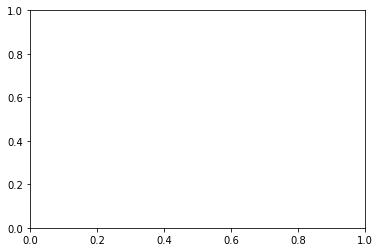

In [49]:
# plot the groupings
# figure out how to add types to each point
import matplotlib.pyplot as plt
#plt.plot(comp2_label_mean, comp1_label_mean, 'ro')
plt.scatter(comp2_label_mean, comp1_label_mean, 'ro')
plt.ylabel('comp1')
plt.xlabel('comp2')
# zip joins x and y coordinates in pairs
for x,y in zip(comp2_label_mean[comp2], comp1_label_mean[comp1]):
    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [11]:
components_labels_df.to_csv("Data/sarcoma-gene-exp-FPKM-tsne2.csv", index=False)